# Logistic Regression 

Welcome to the first classification programming assignment. You will now implement all that you have learnt about logistic regression and classification in this notebook. __Make sure to watch the short video with a few notes on the notebook before starting this exersize__, and good luck!


*Use ctrl + on windows, or cmd + on mac to make the code bigger, and relpace the + with a - to make the code smaller*

*Press __shift + enter__ to run a code block*

## Packages ##

In this first __cell__ you will import some packages that will be useful during the programming assignment

+ __Numpy__ is used a lot for mathematical operations in python, and is especially helpful with matrices and vectors

+ __Matplotlib__ is usedd for plotting graphs and showing vizualized data

+ __PIL__ is used for image processing

+ __Pandas__ is really helpful for reading and manipulating data (for example from .csv files)

+ __os__ is just your operating system

+ __glob__ is used for pathnames (ie file directories)

+ __sklearn__ is a free software machine learning library for Python



In [68]:
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

import pandas as pd

import os

from glob import glob

from sklearn.model_selection import train_test_split

from keras.preprocessing import image


#setting a seed so that all the results will remain constant
np.random.seed(3)

#This just makes sure that the plots are shown in the Jupyter notebook
%matplotlib inline

## Data handling ##

Once you understandd how to create ML applications this is the part that usually takes the longest, but I will just explain what is happening here, and there is nothing in this part that you will need to do.

I have commented in some code boxes that you can change some things to see different things, but do not change anything not specified

Below is where the labels are loaded in, and so is the training and test images. The images are then converted into flattenedd vectors ready to be processed

In [2]:
#Opening a .csv file full of labels for the data you are going to train on

labels_temp = pd.read_csv('data/labels.csv')

#showing the top of the data to make sure it has loaded properly

labels_temp.head()

labels
0       1
1       1
2       1
3       1
4       1

In [3]:
#converting the labels into a numpy array and printing its shape

labels = np.array(labels_temp)

labels = labels.T

print(labels.shape)

(1, 308)


(64, 64, 3)
RGB
(64, 64)


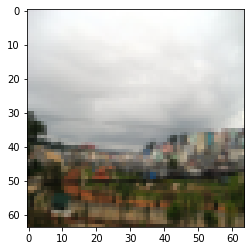

In [4]:
'''

You can go and change the image or image2 directories and try and see what other images are in the
training data. Just a note - the dog images do not go from 0 to m, they are random numbers so you will
have to go to the actual file you downloaded to see what the other filenames are.

'''


#loading the image
image = Image.open('data/dog images/11.png')
image2 = Image.open('data/false images/12false.png')

#converting into numpy array
data = np.array(image)

print(data.shape)

# summarize image details
print(image2.mode)
print(image2.size)


''' change image2 to image below if you want to see that'''
plt.imshow(image2)
plt.show()



### Loading the images ###

Below is where I load in all the images from the files. __You will have to enter your directories in place of mine, the same way I have done it__. I have marked with comments where you will have to change something

In [5]:

'''

This is the path /Users/AasmaanY/Desktop/AI teaching thing/testAlg/data. You need to implement the path to
where your downloaded 'data' file is.

'''

''' CODE BELOW '''
PATH = os.path.abspath(os.path.join('/Users/AasmaanY/Desktop/AI teaching thing/testAlg', 'data'))
''' CODE ABOVE '''

#You can leave this line as it is, it is just going to the dog images file (ie the file with labels 1)
SOURCE_IMAGES = os.path.join(PATH, "dog images")

# Just adding a .png to the end of the images to make sure they are the correct file type
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Size of data
NUM_IMAGES = len(images)
HEIGHT = 64
WIDTH = 64
CHANNELS = 3
SHAPE = (HEIGHT, WIDTH, CHANNELS)

#checking if algorithm is working
print("This means the algorithm is working so far. Number of images = " + str(NUM_IMAGES))


for i,img in enumerate(images):
    #'''enumerate takes all objects and lays them out 1 by 1 to loop through'''

    #'''opening the image'''
    imageTemp = Image.open(img)
    
    #'''converting from an image into a multi dimensional array dimensions - (height,width,channels)'''
    image = np.asarray(imageTemp)

    #'''reshaping the array into a (1,h*w*c) shaped matrix'''
    image0 = image.reshape((1,HEIGHT*WIDTH*CHANNELS))

    #'''below is stacking the row vectors on top of each other to make a (m,h*w*c) matrix'''
    #'''where m is the number of images'''
    
    if i != 0:
        imageFinalArray = np.vstack((imageFinalArray, image0))
    else:
        imageFinalArray = image0
    
    #print(imageFinalArray.shape)

#'''-------------------------------------------------------------------------------------------------------------'''

#'''the bit above was for dog images, bit below is for non dog images'''

#'''-------------------------------------------------------------------------------------------------------------'''

#this is the path to the non dog images
SOURCE_IMAGES = os.path.join(PATH, "false images")

images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

#below is basically the same thing as above, but for the non dog images
for i,img in enumerate(images):

    imageTemp = Image.open(img)

    image = np.asarray(imageTemp)

    image0 = image.reshape((1,HEIGHT*WIDTH*CHANNELS))

    imageFinalArray = np.vstack((imageFinalArray, image0))

    
# printing the final input array's shape

print()
print("Final input array's shape before transposing : " + str(imageFinalArray.shape))
print()
print("Final input array's shape : ")

'''transposing the array (swapping the dimensions), changing name to train input dataset'''
'''dividing by 255 to normalize dataset (all values will be between 0 & 1)'''
train_x = imageFinalArray.T
print(train_x.shape)
#print(train_x)

This means the algorithm is working so far. Number of images = 154

Final input array's shape before transposing : (308, 12288)

Final input array's shape : 
(12288, 308)


In [6]:
#Shuffling the data and the labels. You can uncomment the prints to see the shapes of the different varirables - which I think is really helpful to understand

from sklearn.utils import shuffle
x2 = train_x.T
labels2 = labels.T

#print(labels2.shape)
#print(x2.shape)

x_shuffled, y_shuffled = shuffle(x2, labels2, random_state=3)

#print(x_shuffled.shape)
#print(y_shuffled.shape)
#print(y_shuffled[1])


label = [1], image index = 42


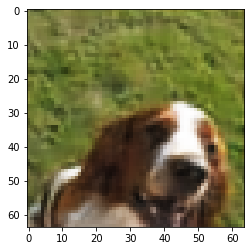

In [7]:
#here you can change the index to see different images in the TRAINING SET
x_shuffledTESTING = x_shuffled.T
y_shuffledTESTING = y_shuffled.T

imgSize = 64

'''CODE BELOW'''
#index has to be between 0 and 307 because that is the number of images that are in the file
index = 42
'''CODE ABOVE'''
plt.imshow(x_shuffledTESTING[:,index].reshape((imgSize, imgSize, 3)))

print("label = " + str(y_shuffledTESTING[:,index]) + ", image index = " + str(index))

In [8]:
#this is just an example showing how the shuffle function works, and shuffels the labels and the data

a = [ [[1,1],[10,10]] ,[[2,2],[20,20]] , [[3,3],[30,30]] ]
b = [1,2,3]  

a2, b2 = shuffle(a, b, random_state=3)

print(a2)
print(b2)


[[[2, 2], [20, 20]], [[1, 1], [10, 10]], [[3, 3], [30, 30]]]
[2, 1, 3]


In [9]:
#Below is splitting the data and labels into train and test sets

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(x_shuffled, y_shuffled, test_size=0.1, random_state = 3)

#printing the shapes of the train and test sets
print(X_train_temp.shape, X_test_temp.shape, y_train_temp.shape, y_test_temp.shape)

#storing the size of the train and test set
m_train = X_train_temp.shape[0]
m_test = X_test_temp.shape[0]

(277, 12288) (31, 12288) (277, 1) (31, 1)


In [10]:
#Normalizing data
train_set_x = X_train_temp.T/255.
test_set_x = X_test_temp.T/255.

#Transposing to get the correct shape
train_set_y = y_train_temp.T
test_set_y = y_test_temp.T

#printing the different shapes
print("Shape of the train set : " + str(train_set_x.shape))
print("Shape of the test set : " + str(test_set_x.shape))
print("Shape of the train labels : " + str(train_set_y.shape))
print("Shape of the test labels : " + str(test_set_y.shape))

Shape of the train set : (12288, 277)
Shape of the test set : (12288, 31)
Shape of the train labels : (1, 277)
Shape of the test labels : (1, 31)


## Sigmoid function##

You will now make the sigmoid function which will compute the sigmoid of z:

`Arguments:`

`z -- A scalar or numpy array of any size.`

`Return:`

`s -- sigmoid(z)`


___Using the notes you have made, fill in the code below___

*Hint:*

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

Use `np.exp()`

In [11]:
def sigmoid(z):

    ### CODE BELOW
    
    s = 1/(1+np.exp(-z))
    
    ### CODE ABOVE
    
    return s

In [12]:
print ("sigmoid([-4, 9]) = " + str(sigmoid(np.array([-4,9]))))

sigmoid([-4, 9]) = [0.01798621 0.99987661]


**Expected Output**: 

sigmoid([-4, 9]) = [0.01798621 0.99987661]

## Initializing parameters

In the code block below you will initialize the parameters (the weights and biases). You will *initialize the weights randomly, but multiply the weights by 0.01*. The bias can simply be initialized to zero


`Arguments:`

`dim -- size of the weight vector`

`Return:`

`w -- initialized vector of shape (dim, 1)`

`b -- initialized scalar (corresponds to the bias)`


___Using the notes you have made, fill in the code below___

*Hint:*

Use `np.random.randn()`, look up its documentation online.

*Hint 2:*

It takes the dimensions as arguments



In [32]:
def initialize_random(dim):

    np.random.seed(3)
    
    ### CODE BELOW
    
    w = np.random.randn(dim,1) * 0.01
    
    b = 0
    
    ### CODE ABOVE

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [33]:
dim = 3
w, b = initialize_random(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.01788628]
 [0.0043651 ]
 [0.00096497]]
b = 0


**Expected Output**: 

w = [[0.01788628]
 [0.0043651 ]
 [0.00096497]]
 
b = 0



## Computing predictions, cost, and derivatives

In the code block below you will compute A, the cost, "dw" and "db". *For this part you will need to refer to any notes you have made, or to the video about the vectorized implementation of logistic regression*. This will set up the parameters ready for gradient descent


`Arguments:`

`w -- weights, a vector (num_px * num_px * 3, 1)`

`b -- bias, a scalar`

`X -- data, a matrix (num_px * num_px * 3, number of examples)`

`Y -- label, vector (1, number of examples)`

`Return:`

`cost -- negative log-likelihood cost for logistic regression`

`dw -- gradient of the cost with respect to w`

`db -- gradient of the cost with respect to b`


___Using the notes you have made, fill in the code below___

*Hint:*

Look at vectorized implementation video

*Hint 2:*

Use `np.log()` for logs,  `np.dot()` for matrix multiplication (NOT element-wise multiplication), `np.sum()` for summations, `*` for element-wise multiplications, and the `sigmoid()` function you implemented for the sigmoid function




In [34]:
def compute_grads_and_cost(w, b, X, Y):
    
    
    #number of examples in input
    m = X.shape[1]
    

    # calculating prediction and cost
    
    ### CODE BELOW
    
    #calculating the prediction
    A = sigmoid(np.dot(w.T,X)+b)
    
    # compute cost DONT FORGET np.sum()
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
   
    ### CODE ABOVE
    
    
    # calculating derivatives
    
    ### CODE BELOW
    
    #calculating (dcost/dw) = "dw"
    dw = 1/m*np.dot(X,(A-Y).T)
    
    #calculating (dcost/db) = "db"
    db = 1/m*np.sum(A-Y)
    
    ### CODE ABOVE

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    gradients = {"dw": dw,
                 "db": db}
    
    return gradients, cost

In [35]:
w, b, X, Y = np.array([[1],[1]]), 1, np.array([[3,-3,3],[3,-3,-3.3]]), np.array([[1,0,0]])
gradients, cost = compute_grads_and_cost(w, b, X, Y)
print ("dw = " + str(gradients["dw"]))
print ("db = " + str(gradients["db"]))
print ("cost = " + str(cost))

dw = [[ 0.66058387]
 [-0.74261045]]
db = 0.2246565239660168
cost = 0.3702709546094501


**Expected Output**:

dw = [[ 0.66058387][-0.74261045]]

db = 0.2246565239660168

cost = 0.3702709546094501

## Training the algorithm

In this next function you will implement one step of gradient descent in order to make your algorithm learn, this will be called multiple times in a for loop in order to train the algorithm multiple times.

`Arguments:`

`w -- weights, a vector (num_px * num_px * 3, 1)`

`b -- bias, a scalar`

`X -- data, a matrix (num_px * num_px * 3, number of examples)`

`Y -- label, vector (1, number of examples)`

`num_iterations -- number of steps of gradient descent being implemented`

`learning_rate -- the learning rate (alpha)`

`Return:`

`parameters -- dictionary containing the weights w and bias b`

`gradients -- dictionary containing the gradients of the weights and bias`

`costs -- list of all the costs computed during the optimization`



___Using the notes you have made, fill in the code below___

*Hint:*

Use previous functions you have made to calculate the costs and gradients and use gradient descent to update the weights and biases

*Hint 2:*

parameter = parameter - alpha * dparameter

In [36]:
def train(w, b, X, Y, num_iterations, learning_rate):

    costs = []
    
    for i in range(num_iterations):
        
        ### CODE BELOW
        gradients, cost = compute_grads_and_cost(w, b, X, Y)
        ### CODE ABOVE
        
        # getting gradients that were computed
        dw = gradients["dw"]
        db = gradients["db"]
        
        # updadting the parameters
        
        ### CODE BELOW
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### CODE ABOVE
        
        # Recording and printing the costs every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"w": w,
              "b": b}
    
    gradents = {"dw": dw,
             "db": db}
    
    return parameters, gradients, costs

In [37]:
parameters, gradients, costs = train(w, b, X, Y, num_iterations= 100, learning_rate = 0.009)

print ("w = " + str(parameters["w"]))
print ("b = " + str(parameters["b"]))
print ("dw = " + str(gradients["dw"]))
print ("db = " + str(gradients["db"]))

Cost after iteration 0: 0.370271
w = [[0.68711295]
 [1.35688941]]
b = 0.8922086958234813
dw = [[ 0.1743475 ]
 [-0.20473946]]
db = 0.06163622737541586


**Expected Output**: 

Cost after iteration 0: 5.801545

w = [[0.19033591][0.12259159]]

b = 1.9253598300845747

dw = [[0.67752042][1.41625495]]

db = 0.21919450454067657



## Training the algorithm

Now that you have implemented code to 'learn' w and b, you can use the parameters to predict the (hopefully) correct labels for a dataset (of images)

`Arguments:`

`w -- weights, a vector (num_px * num_px * 3, 1)`

`b -- bias, a scalar`

`X -- data, a matrix (num_px * num_px * 3, number of examples)`

`Return:`

` Y_prediction -- a vector containing all predictions (0 or 1) for the examples in X`



___Using the notes you have made, fill in the code below___

*Hint:*

Use if statements to go from values between 1 and 0 to 1 or 0. Remember the prediction is equal to 1 if A >= 0.5

In [38]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # compute the raw prediction value
    
    ### CODE BELOW
    A = sigmoid(np.dot(w.T,X)+b)
    ### CODE ABOVE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities ( A[0,i] ) to actual predictions ( p[0,i] )
        ### CODE BELOW
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        elif A[0,i] < 0.5:
            Y_prediction[0,i] = 0
        ### CODE ABOVE
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [39]:
w = np.array([[0.333],[0.667]])
b = 1
X = np.array([[1.,-1,-3,7],[1,-7,0,-5]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 0. 1. 0.]]


**Expected Output**: 


predictions = [[1. 0. 1. 0.]]

## Putting everything together

Now you will put everything together (in the correct order into a final model

`Arguments:`

`X_train -- training set, a matrix (num_px * num_px * 3, m_train)`

`Y_train -- training labels, a row vector (1, m_train)`

`X_test -- test set, a matrix (num_px * num_px * 3, m_test)`

`Y_test -- test labels, a row vector (1, m_test)`

`num_iterations -- number of steps of gradient descent being implemented`

`learning_rate -- the learning rate (alpha)`

`Return:`

`d -- dictionary containing information about the model`



___Using the notes you have made, fill in the code below___

*Hint:*

Put everything in order, as stated with comments

In [48]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):

    ### CODE BELOW
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_random(X_train.shape[0])
    #has to be the same as the down length of matrix X ie X_train.shape[0]

    # Gradient descent
    parameters, gradients, costs = train(w,b,X_train, Y_train, num_iterations, learning_rate)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    
    ### CODE ABOVE
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

Cost after iteration 0: 0.861388
Cost after iteration 100: 0.666144
Cost after iteration 200: 0.531527


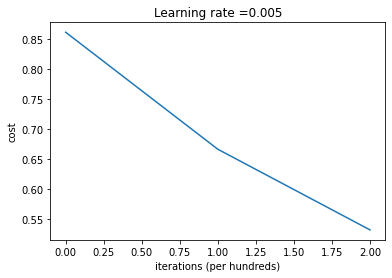

train accuracy: 81.5884476534296 %
test accuracy: 70.96774193548387 %


In [49]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 300, learning_rate = 0.005)

## Training the model I

As you can see the accuracy was around 81% on the train set, but the accuracy on the test set was much lower (~71%). This is because of the hyperparameter selection. If you take bigger gradient descent steps (ie a higher learning rate, theoretically the algorithm should get a lower cost quicker, so let's try that.

Cost after iteration 0: 0.861388
Cost after iteration 100: 1.307524
Cost after iteration 200: 1.037130


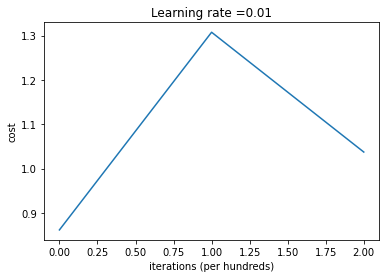

train accuracy: 68.59205776173285 %
test accuracy: 58.064516129032256 %


In [52]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 300, learning_rate = 0.01)

## Training the model II

That wasn't good. Basically what happened here is that the steps were too big, and so the algorithm, instead of converging, actually chose more and more 'wrong' hyperparameters. Right now the algorithm is as good as guessing. Now let's try increasing the number of iterations instead of the learning rate

Cost after iteration 0: 0.861388
Cost after iteration 100: 0.666144
Cost after iteration 200: 0.531527
Cost after iteration 300: 0.428359
Cost after iteration 400: 0.349070
Cost after iteration 500: 0.309759
Cost after iteration 600: 0.285909
Cost after iteration 700: 0.265610
Cost after iteration 800: 0.248083
Cost after iteration 900: 0.232778
Cost after iteration 1000: 0.219288
Cost after iteration 1100: 0.207302
Cost after iteration 1200: 0.196576
Cost after iteration 1300: 0.186919
Cost after iteration 1400: 0.178176


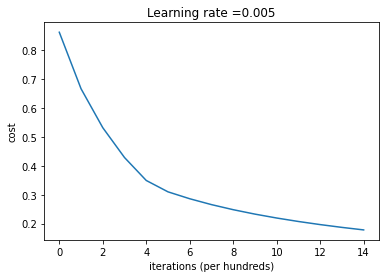

train accuracy: 99.27797833935018 %
test accuracy: 83.87096774193549 %


In [53]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = 0.005)

## Training the model III

Now that is looking much better! You can see the cost starts going down less and less and as you can see it is approaching the global minimum. Now I want you to try some hyperparameters, and if your hyperparameters do better than the model above, you can get a free virtual high five!(I did not spend a long time tuning it so I'm sure you can get better models easily)

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = None, learning_rate = None)

## Checking what you classified wrong

Change the index to a number between 0 and 4 to see images that you wrongly classified
The actual label = 1, you predicted that y = 0.0, which is wrong


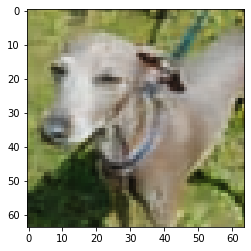

In [65]:
# Example of a picture that was wrongly classified.

num_px = 64

falsePrediction = []

for i in range(0,m_test-1):
    if test_set_y[0,i] != d["Y_prediction_test"][0,i]:
        falsePrediction.append(i)

print("Change the index to a number between 0 and " + str(len(falsePrediction)-1) + " to see images that you wrongly classified" )
index = falsePrediction[0]

plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

print ("The actual label = " + str(test_set_y[0,index]) + ", you predicted that y = " + str(d["Y_prediction_test"][0,index]) + ", which is wrong")



Let's also plot the cost function and the gradients.

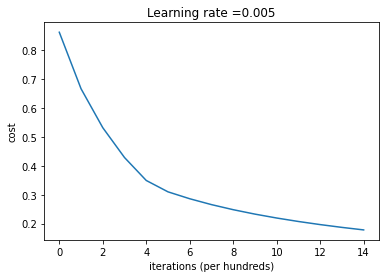

In [66]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## Test with your own image

You can now use your own image and see the output of your model! To do that:
    1. Find a .png or .jpg image that you want to test
    2. Put it in the 'uploadedimages' file that you downloaded
    3. Change the image path below to that image's filename
    
I have already uploaded an image that you can see the algorithm working on. It does classify correctly when the model is trained for 1500 iterations at a learning rate of 0.005

You predicted a 1.0 which means the algorithm thinks the image is of a dog


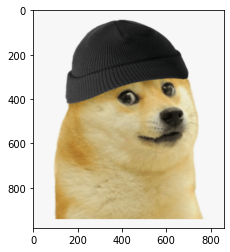

In [86]:

#CODE BELOW

#upload your image to the uploaded images file, and change the directory to the image you want to test on
#make sure the image is a .png or .jpg, others file types may not work.
img_path = 'uploadedimages/my_image.png'

#CODE ABOVE

img_not_cropped = image.load_img(img_path)
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0

x_final = x.reshape((1, num_px*num_px*3)).T

#print(x_final.shape)

my_predicted_image = predict(d["w"], d["b"], x_final)

if np.squeeze(my_predicted_image) == 1:
    print("You predicted a " + str(np.squeeze(my_predicted_image)) + " which means the algorithm thinks the image is of a dog")
else:
    print("You predicted a " + str(np.squeeze(my_predicted_image)) + " which means the algorithm thinks the image is not of a dog")
    
plt.imshow(img_not_cropped)

Please do go ahead and message me (Aasmaan) if you want any extra help or have any questions (not necessarily about this).